**Relatório preliminar**

* Disciplina:
    * Inteligência Computacional
* Profesor:
    * Alexandre Gonçalves Evsukoff
* Alunos:
    * Celso Teixeira Tinoco
    * Marcos Seefelder de Assis Araujo



# Introdução:

O objetivo principal do então trabalho é o aprimoramento nos conhecimentos referentes a inteligência computacional, a partir da prática do uso de ferramentas estatísticas, algoritmos e bibliotecas de <i>Data Science</i>. Todo o procedimento será realizado utilizando Python 3 e algumas bibliotecas matemáticas auxiliares. Neste relatório preliminar será apresentado um problema de classificação e será feita uma primeira análise sobre o mesmo, com extração de informações relevantes e discussão sobre suas características.

A próxima seção (**Formulação do Problema**) apresenta o problema que pretende-se resolver. Na seção de **Caracterização**, iremos caracterizar os conjunto de dados de treinamento através das análises do conjunto de dados disponível. E por último, apresentaremos as tecnologias que escolhemos como ferramentas na seção de **Apresentação da Tecnologia**.

# Formulação do problema:

O problema escolhido para ser explorado é um problema de classificação de folhas, chamado *Leaf Classification*, e pode ser encontrado na seção de *Competitions* do site [Kaggle](https://www.kaggle.com/competitions). O objetivo desse problema é classificar diferentes espécies de folhas, a partir de atributos obtidos através da análise de suas imagens binarizadas.

# Caracterização:

## Dados Fornecidos

O <i>dataset</i> consiste em aproximadamente 1584 imagens de espécies de folhas, que foram convertidas em silhuetas binárias pretas com fundo branco. Cada imagem acompanha três vetores de informações: Um descritor de forma contígua, um histograma da textura interior, e um histograma de margem de fina escala. Cada exemplar de folha possui um identificador único e desconhecido, uma classificação e um de cada vetor citado. Cada vetor possui 64 atributos que o descrevem.

## Conjunto de Treinamento

É fornecido com o problema um conjunto de treinamento. Este é composto de 990 registros do total do *dataset*.

## Análise 

Nessa seção iremos analisar e pré-processar o conjunto de dados de treinamento. 

Comentários sobre as nossas conclusões em relação ao mesmo serão adicionados ao longo da seção, seguidos dos testes feitos.

### Formato dos dados de teste:

In [1]:
# Importar bibliotecas úteis
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
train = pd.read_csv('train.csv')

In [3]:
train.shape

(990, 194)

In [4]:
columnNames = train.columns.values
count = 0
for i in columnNames:
    print(i, end=", ")
    count = count + 1
    if count>5:
        print("", end="\n")
        count = 0

id, species, margin1, margin2, margin3, margin4, 
margin5, margin6, margin7, margin8, margin9, margin10, 
margin11, margin12, margin13, margin14, margin15, margin16, 
margin17, margin18, margin19, margin20, margin21, margin22, 
margin23, margin24, margin25, margin26, margin27, margin28, 
margin29, margin30, margin31, margin32, margin33, margin34, 
margin35, margin36, margin37, margin38, margin39, margin40, 
margin41, margin42, margin43, margin44, margin45, margin46, 
margin47, margin48, margin49, margin50, margin51, margin52, 
margin53, margin54, margin55, margin56, margin57, margin58, 
margin59, margin60, margin61, margin62, margin63, margin64, 
shape1, shape2, shape3, shape4, shape5, shape6, 
shape7, shape8, shape9, shape10, shape11, shape12, 
shape13, shape14, shape15, shape16, shape17, shape18, 
shape19, shape20, shape21, shape22, shape23, shape24, 
shape25, shape26, shape27, shape28, shape29, shape30, 
shape31, shape32, shape33, shape34, shape35, shape36, 
shape37, shape38, shape3

#### Observações:

Com os testes acima pode-se verificar a estrutura dos dados de treinamento fornecidos. Percebe-se que alem dos três vatores (margin, shape e texture) existem duas colunas (id, species) que serão posteriormente retiradas para relizar as análises estatísticas.

### Verificação de Valores Ausentes:

In [5]:
# conferindo valores ausentes:
missing = 0
nullcheck = train.isnull()
for i in nullcheck:
    for j in i:
        if (j == True):
            missing = missing+1
            
print(missing, " valores ausentes")

0  valores ausentes


#### Observações:

Verificamos, portanto, que não há valores ausentes no conjunto de dados.

### Distribuição das classes:

In [6]:
classCounts = train["species"].value_counts()
print(len(classCounts), " classes distintas")
print("Máximo de ocorrências de uma classe: ", max(classCounts))
print("Mínimo de ocorrências de uma classe: ", min(classCounts));

99  classes distintas
Máximo de ocorrências de uma classe:  10
Mínimo de ocorrências de uma classe:  10


#### Observações:

Pode-se verificar que a distribuição das classes é equilibrada, o que diminui a chance de sluções tendenciosas na etapa de classificação do projeto.

### Removendo colunas não-atributo:

In [7]:
labels = train["species"]
train = train.drop(['species', 'id'], axis=1)

classes = []

for l in labels.values:
    if l not in classes:
        classes.append(l)

#### Observações:

Na etapa acima realizamos a retirada previamente indicada das colunas *species* e *id* para começar a análise estatística dos dados.

### Boxplots dos Vetores Característicos:

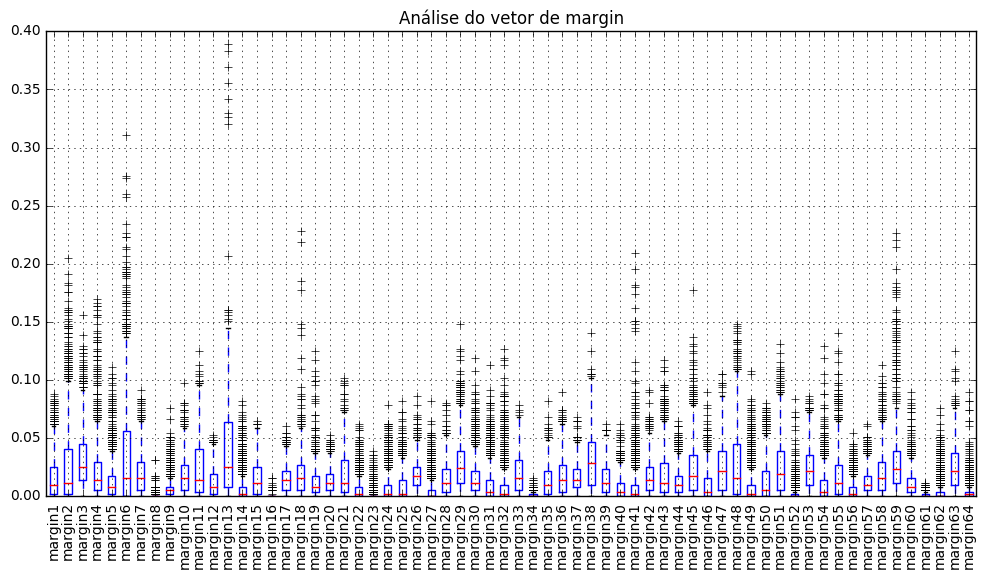

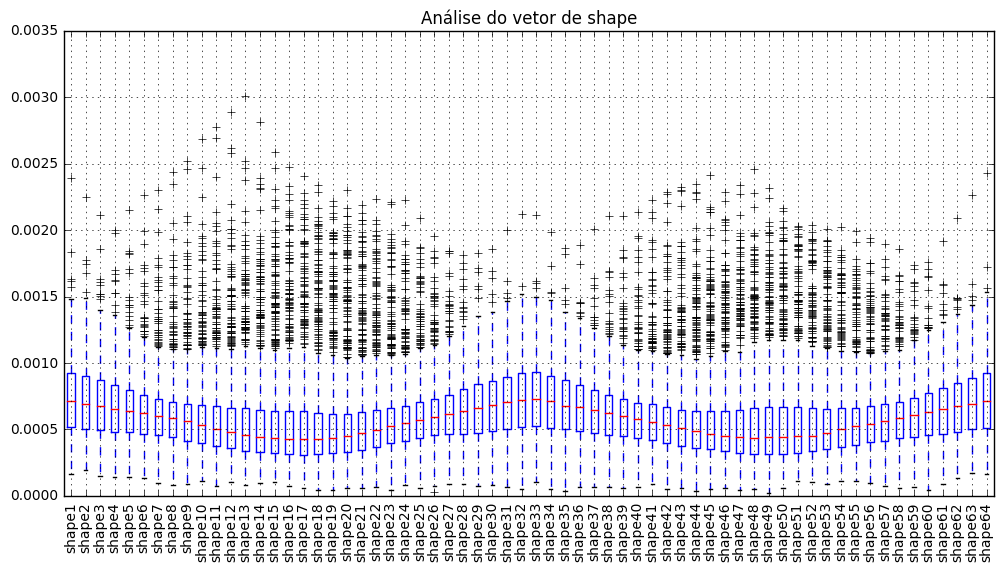

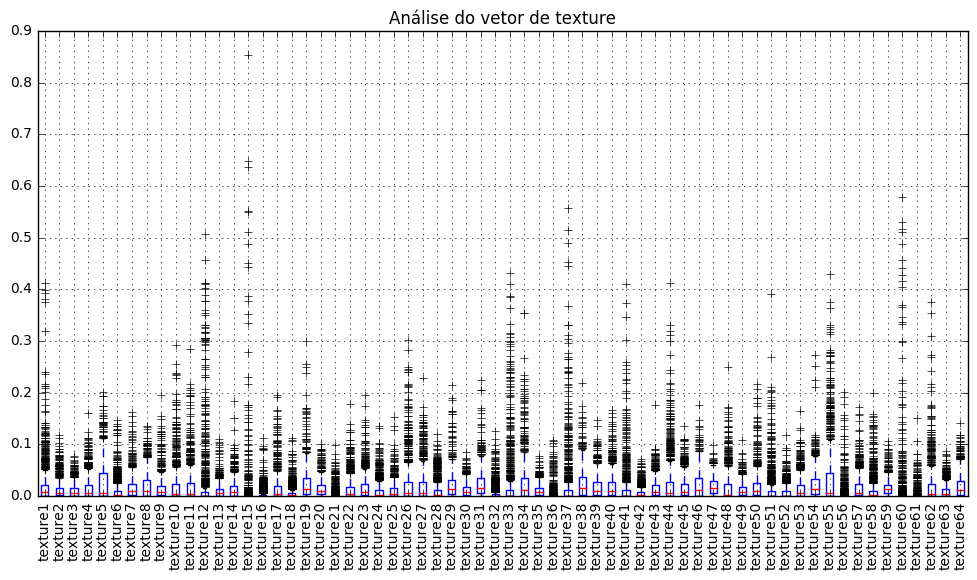

In [8]:
figure(figsize(12,6))
title("Análise do vetor de margin")
train.ix[:,'margin1':'margin64'].boxplot(rot=90)

figure(figsize(12,6))
title("Análise do vetor de shape")
train.ix[:,'shape1':'shape64'].boxplot(rot=90)

figure(figsize(12,6))
title("Análise do vetor de texture")
train.ix[:,'texture1':'texture64'].boxplot(rot=90)

#### Observsções:

Percebe-se que pelos boxplots que há uma grande quantidade de *outliers* nos atributos.

### Histogramas dos vetores característicos:

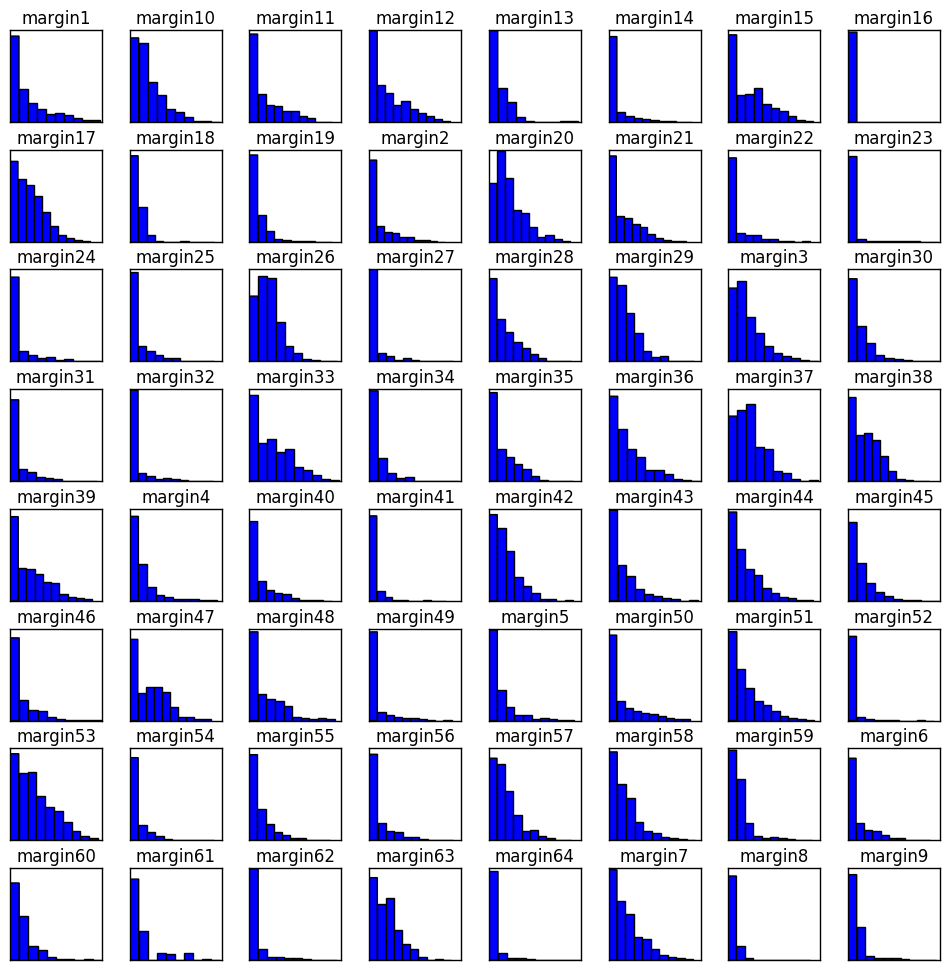

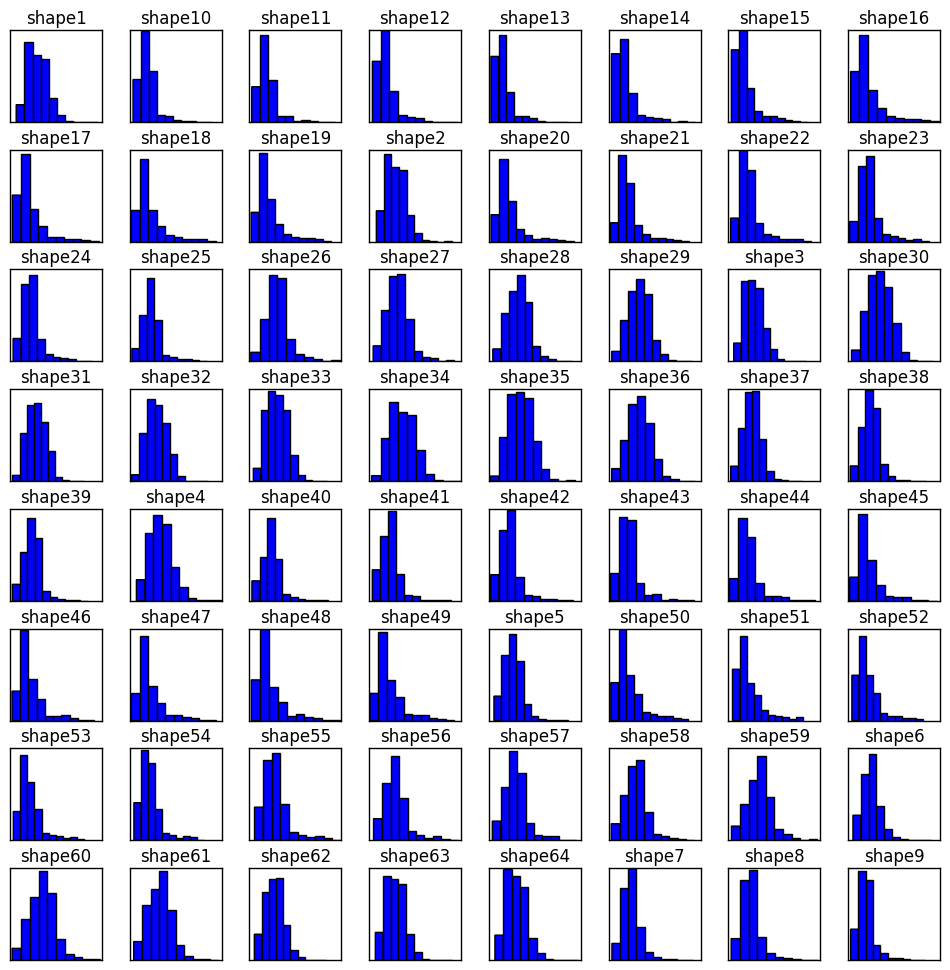

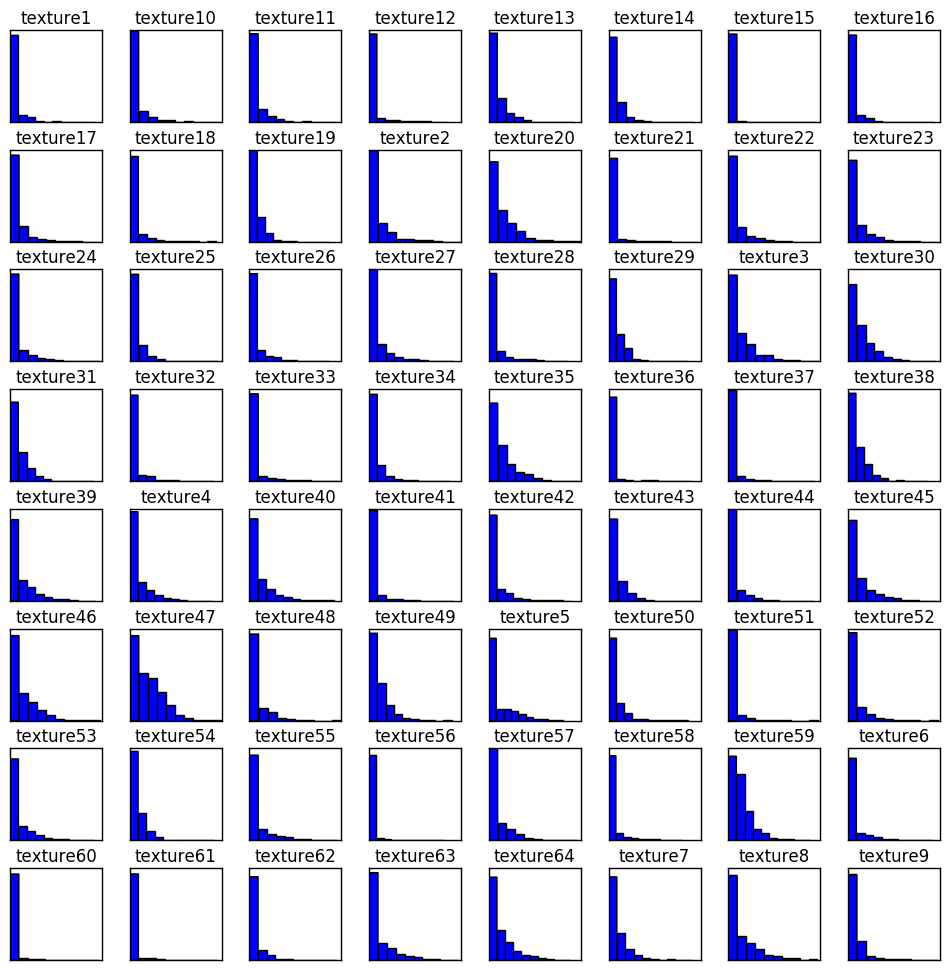

In [9]:
figure(figsize(12,12))
mat = train.ix[:,'margin1':'margin64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)

figure(figsize(12,12))
mat = train.ix[:,'shape1':'shape64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        
figure(figsize(12,12))
mat = train.ix[:,'texture1':'texture64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        

#### Observações:

Verifica-se que tanto os vetores *margin* quanto *texture* tem distribuições assimetricas de seus atributos, enquanto o vetor *shape* tem alguns atributos que são mais próximos de uma distribuição normal, porém ainda com assimetria.

A grande quantidade de outliers verificada nos *boxplots* faz sentido quando se leva em consideração a assimetria verificada.


### Matrizes de distâncias

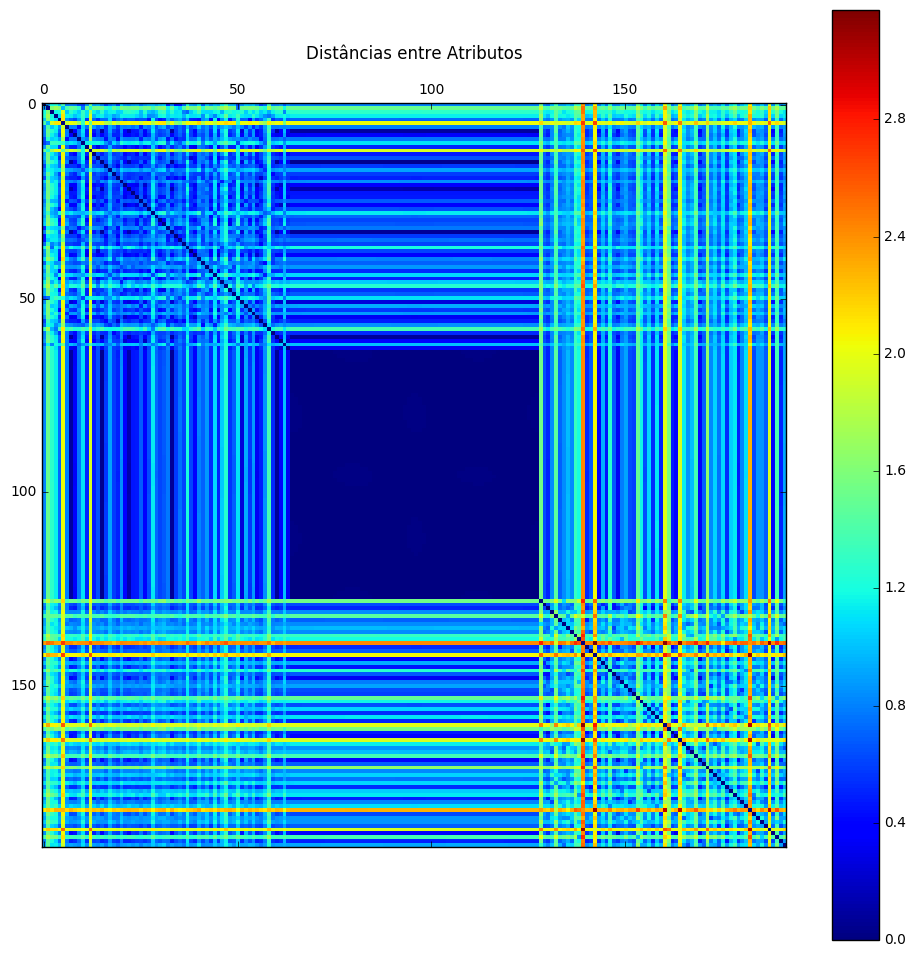

In [10]:
from scipy.spatial.distance import pdist, squareform

figure(figsize=(12,6))

distance = lambda column1, column2: pd.np.linalg.norm(column1 - column2)
distMat = train.apply(
                lambda col1: train.apply(
                                    lambda col2: distance(col1, col2)
                                        )
                     )
mat = matshow(distMat, cmap='jet')
title("Distâncias entre Atributos")
colorbar(mat);

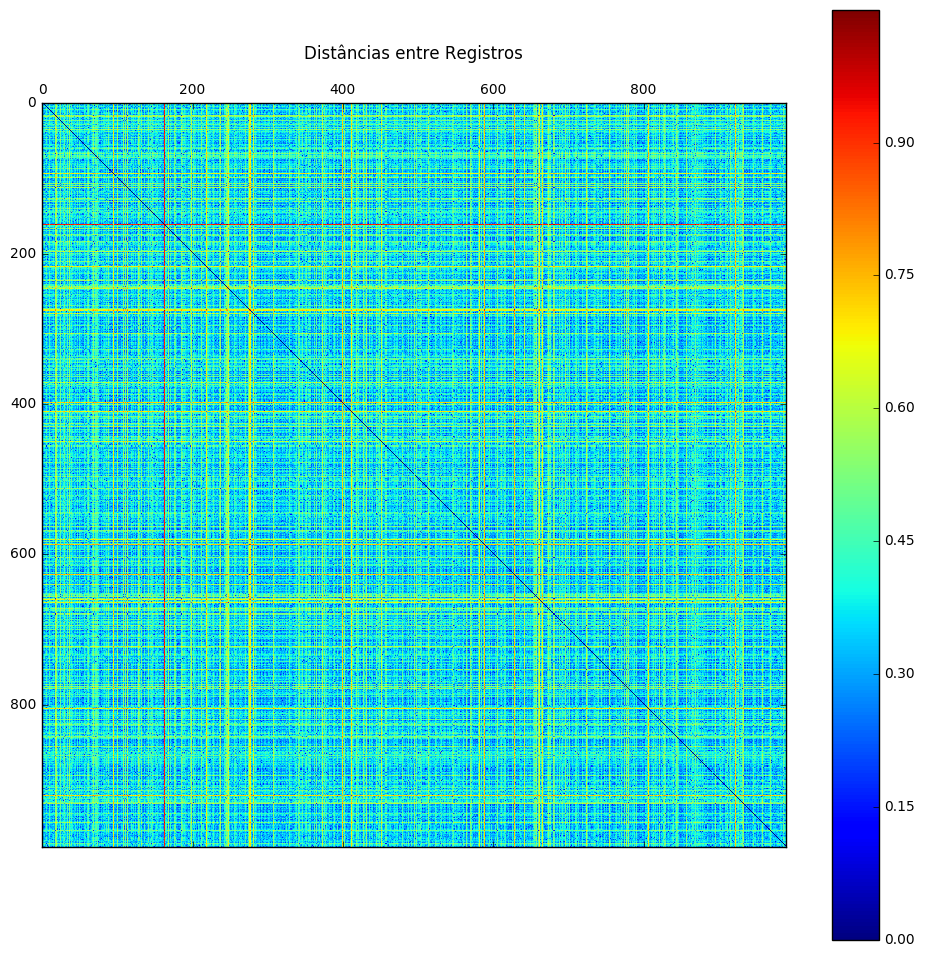

In [11]:
distances = pdist(train.values, metric='euclidean')
DistMatrix = squareform(distances)

mat = matshow(DistMatrix, cmap='jet')
title("Distâncias entre Registros")
colorbar(mat);

#### Observações:

Na **Matriz de Distâncias entre os Atributos** verifica-se que há distância muito pequena entre os valores do vetor de *shape*. Não podem ser tiradas muitas conclusões dessa observação, uma vez que não foi realizada nenhuma normalização e as ordens de grandeza entre os vetores pode ser diferente. Isso será comprovado mais à frente na seção **Matrizes pós-padronização**.

Já em relação às **Distâncias entre os Registros**, destaca-se um registro com valores muito distantes de todos os outros.

Novamente, à essa altura da análise, embora a **Matriz de Distâncias entre Registros** indique um *outlier*, não podem ser tiradas muitas conclusões, considerando-se que a escala dos vetores pode ser diferente.

### Matriz de correlação:

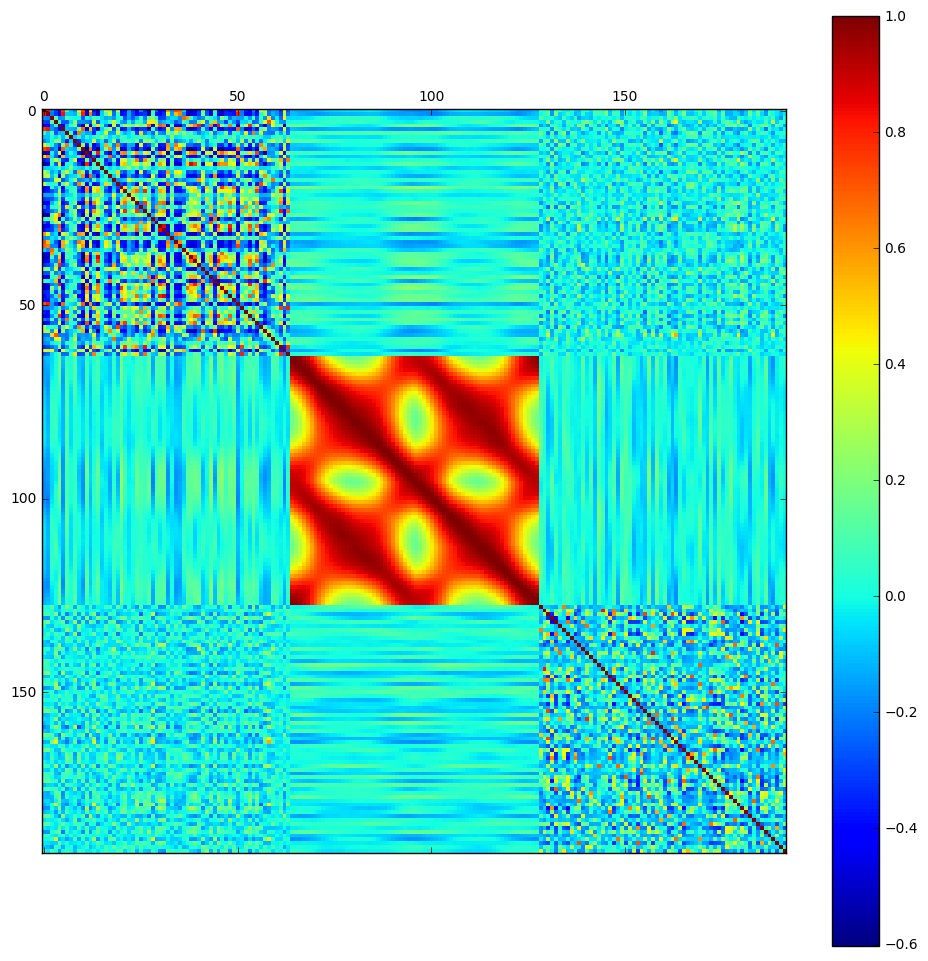

In [12]:
figure(figsize=(12,6))
mat = matshow(train.corr(), cmap='jet')
colorbar(mat);

#### Observações:

É interessante destacar a alta correlação presente entre grande parte dos atributos do vetor *shape*. Observando essa informação, associada às matrizes anteriores e aos histogramas e os *boxplots*, percebe se que uma pequena faixa de atributos do vetor *shape* contém os atributos mais bem comportados, pois tem a distribuição mais próxima da normal, com baixa correlação.

### Redução da dimensionalidade:

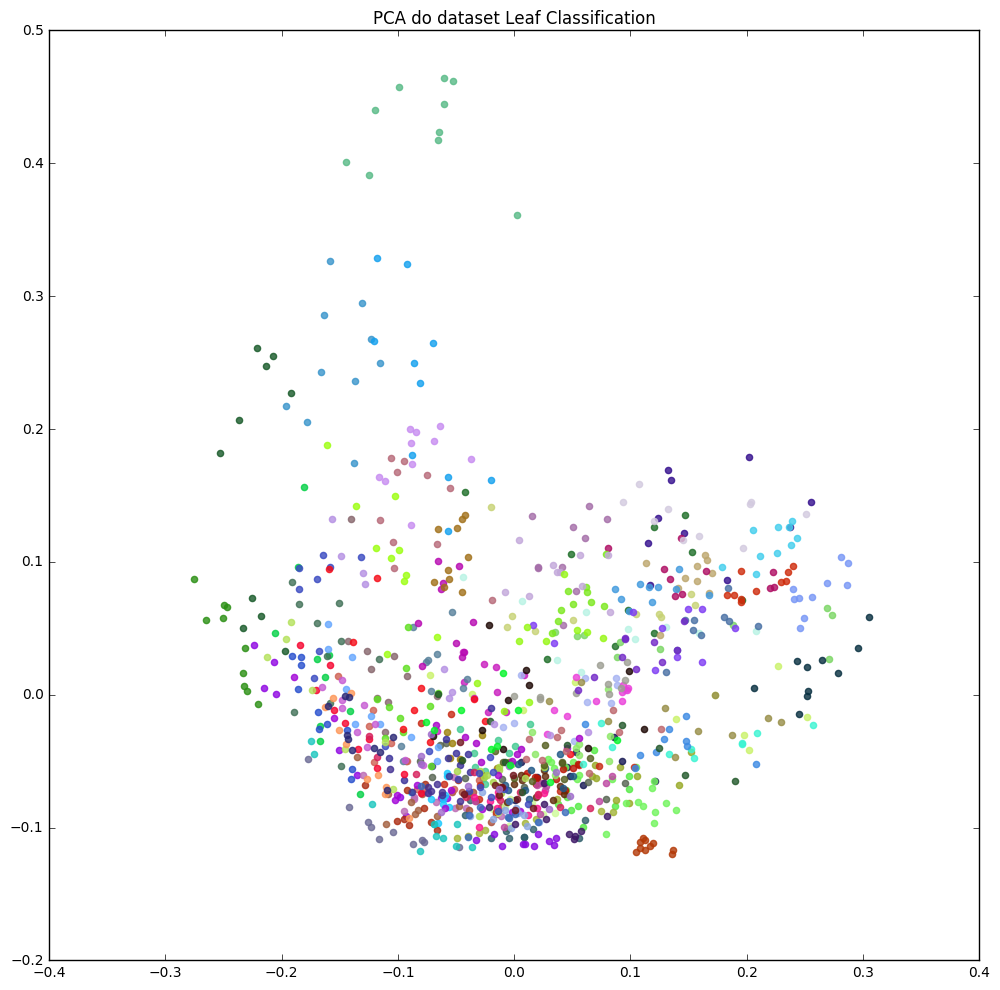

In [13]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
X_r = pca.fit(train.values).transform(train.values)

for i in zip(classes):
    scatter(X_r[labels.values == i, 0], X_r[labels.values == i, 1], 
            color=numpy.random.rand(3,1), alpha=.8, 
            label=i)

title('PCA do dataset Leaf Classification')

In [14]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X = lda.fit(train.values, labels.values)

/home/mseefelder/local/main-venv/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/mseefelder/local/main-venv/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


99


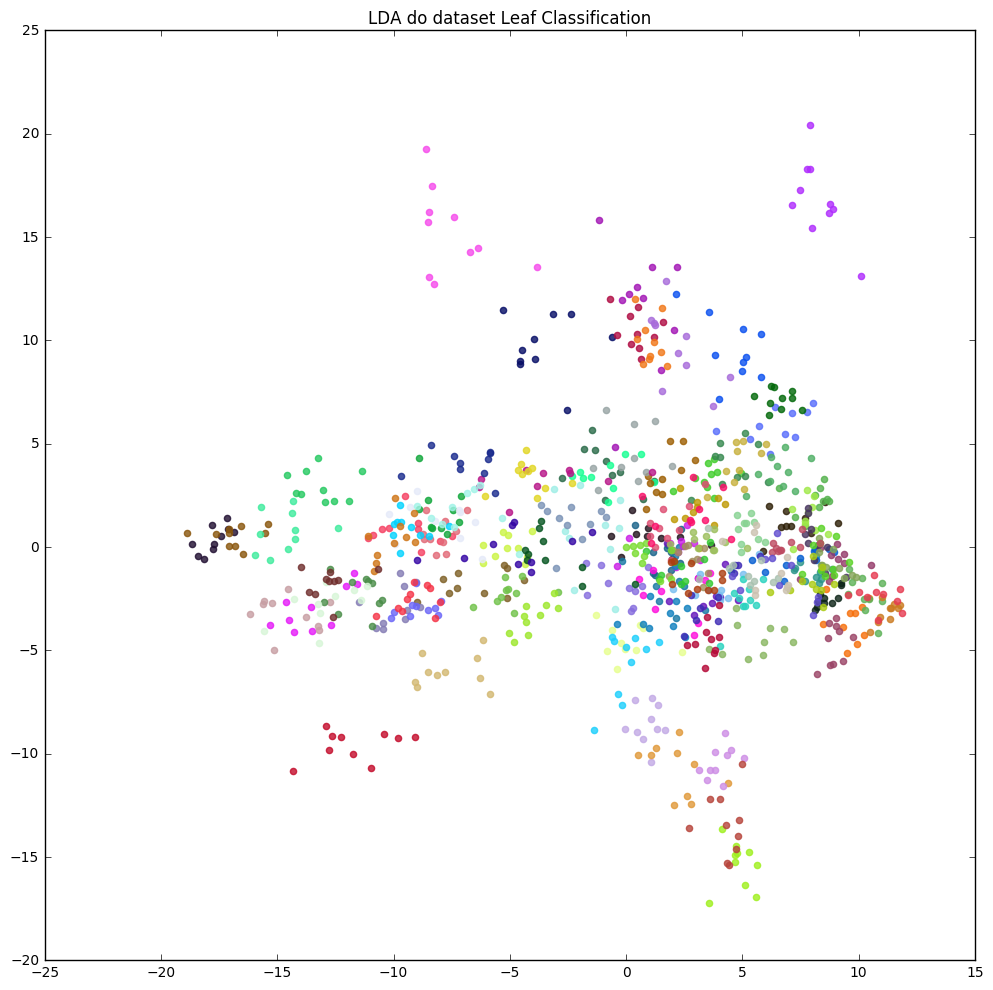

In [15]:
X_r2 = X.transform(train.values)

print(len(classes))

for i in zip(classes):
    scatter(X_r2[labels.values == i, 0], X_r2[labels.values == i, 1], 
            alpha=.8, color=numpy.random.rand(3,1),
            label=i)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
title('LDA do dataset Leaf Classification')

#### Observações:

Os testes acima são uma tentativa de realizar uma redução de dimensionalidade do *dataset* e a posterior projeção disso em 2D utilizando dois métodos: **Análise de Componentes Principais** (PCA) e **Análise Discriminante Linear"** (LDA).

Visualmente é claro que a projeção obtida através da LDA é mais eficaz na separação das classes, o que era de se esperar, uma vez que leva em consideração a informação de classe.

É importante também destacar que o método de *fit* da LDA lançou *Warnings* em relação à não-normalização dos atributos e a variáveis colineares. Ambas as situações eram previsatas, uma vez que não padronizamos os dados e não retiramos atributos muito correlacionados.

### Padronização  de Variáveis:

Para nos livrarmos dos efeitos de escalas diferentes, utilizaremos uma padronização com **mínimo e máximo** para o intervalo [-1, 1].

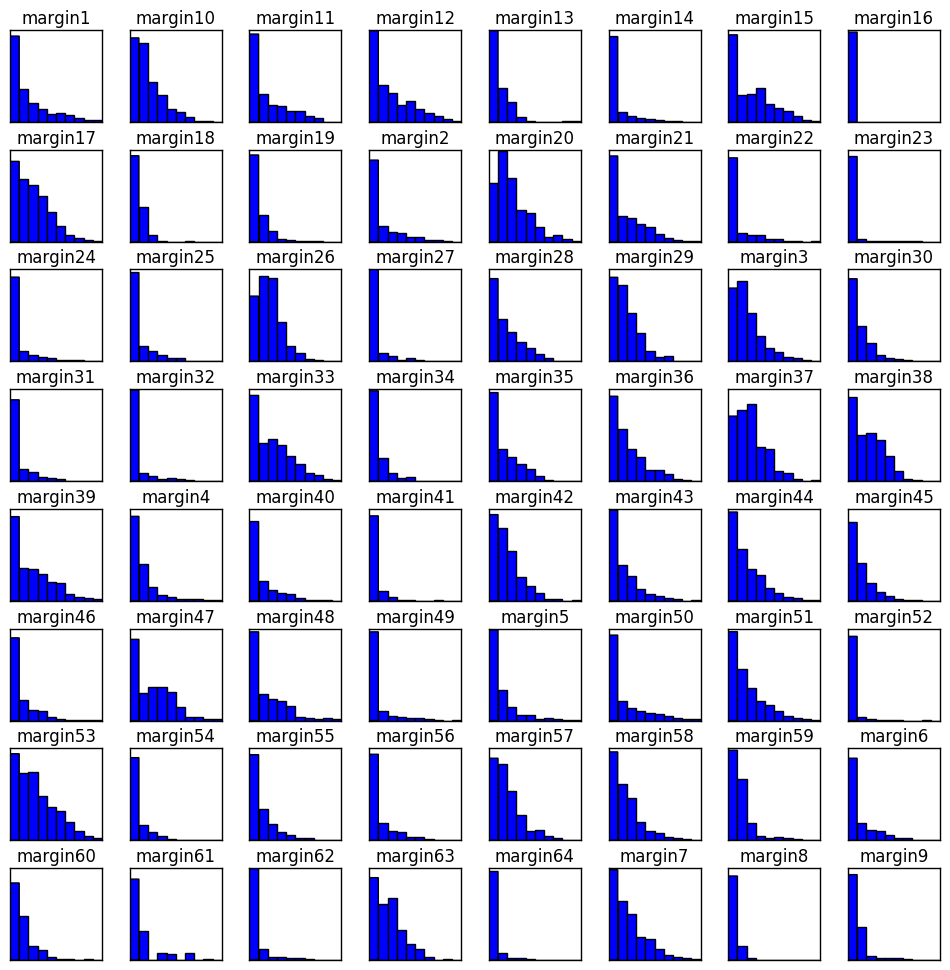

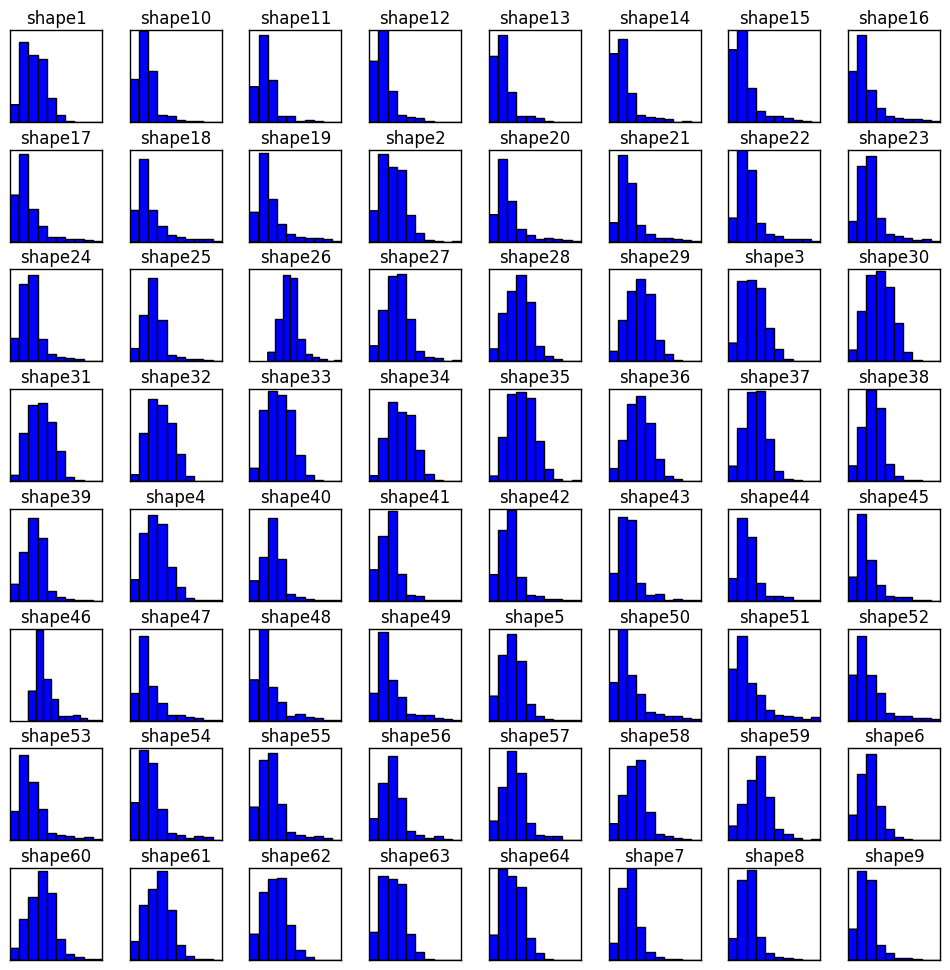

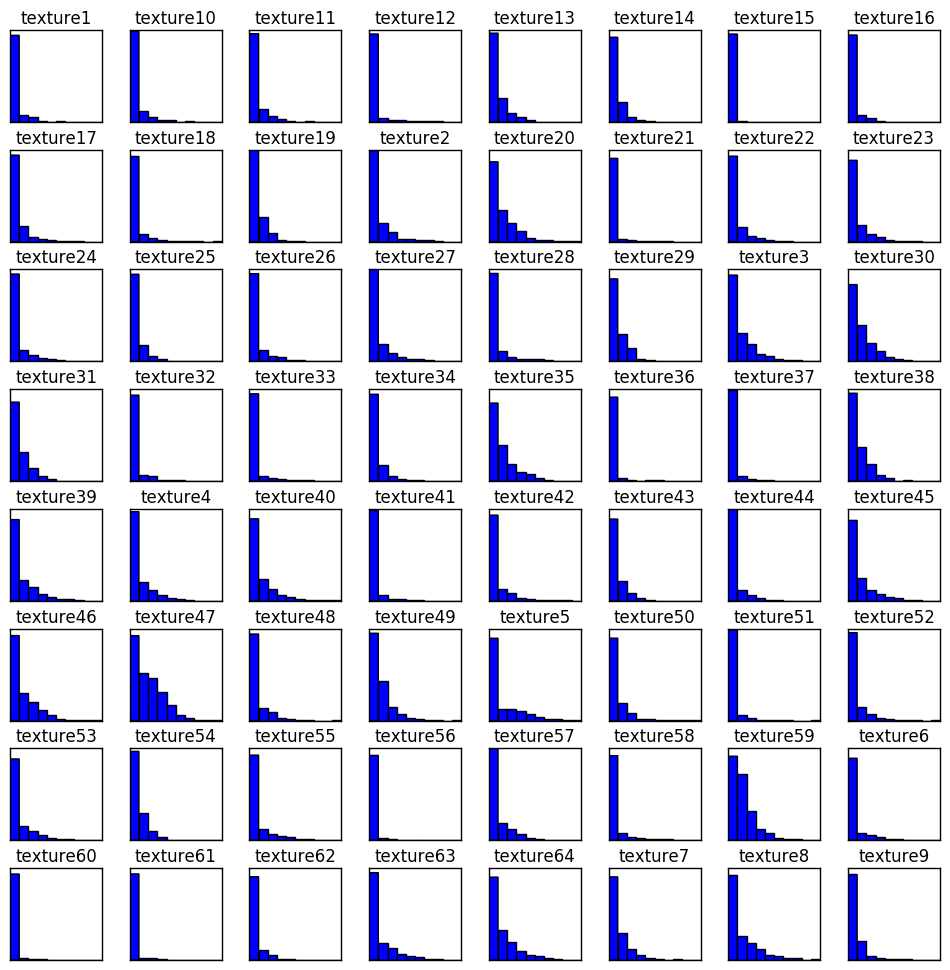

In [16]:
from scipy import stats

""""""
# Padronização por zscore do log
train_minmax = train

for c in train_minmax.columns.values:
    #print(c)
    minimum = min(train_minmax[c].values)
    maximum = max(train_minmax[c].values)
    minmax = (maximum-minimum)/2.0
    mid = minimum + minmax
    train_minmax[c] = (train_minmax[c].values-mid)/minmax
    
#train = train_zscore
""""""

figure(figsize(12,12))
mat = train_minmax.ix[:,'margin1':'margin64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)

figure(figsize(12,12))
mat = train_minmax.ix[:,'shape1':'shape64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        
figure(figsize(12,12))
mat = train_minmax.ix[:,'texture1':'texture64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        

### Matrizes pós-padronização:

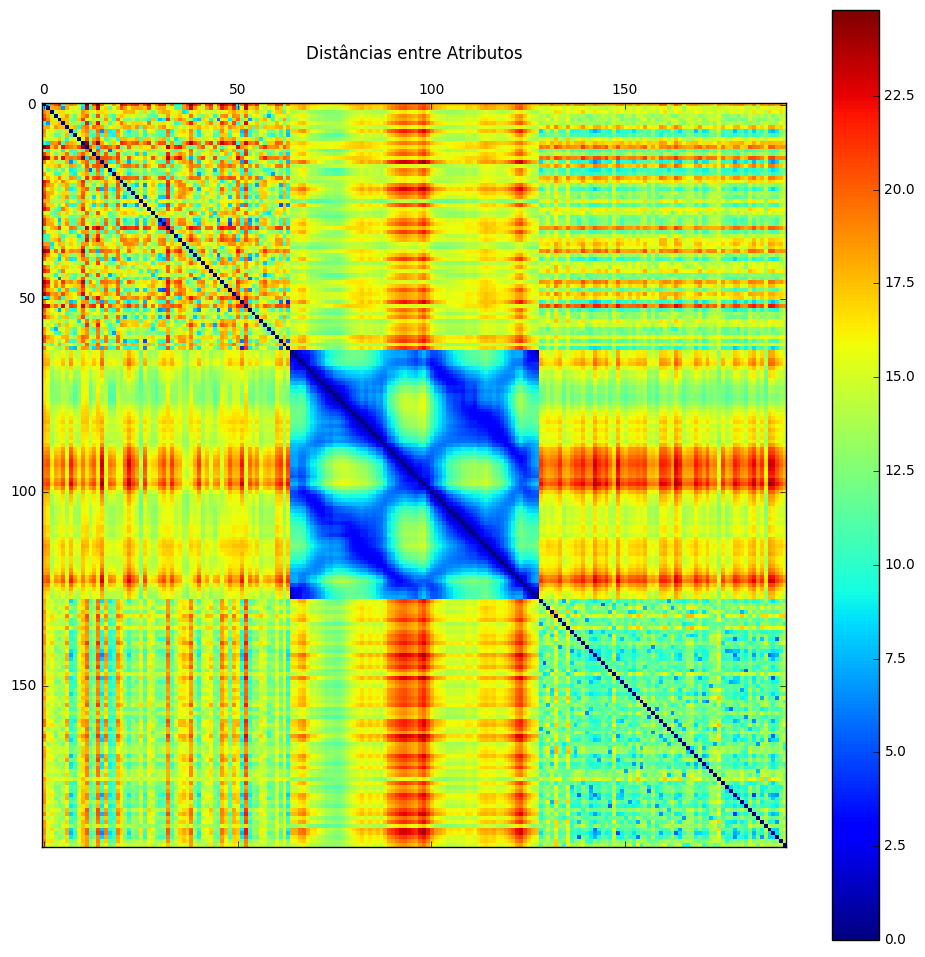

In [17]:
figure(figsize=(12,6))

distance = lambda column1, column2: pd.np.linalg.norm(column1 - column2)
distMat = train_minmax.apply(
                lambda col1: train_minmax.apply(
                                    lambda col2: distance(col1, col2)))
mat = matshow(distMat, cmap='jet')
title("Distâncias entre Atributos")
colorbar(mat);

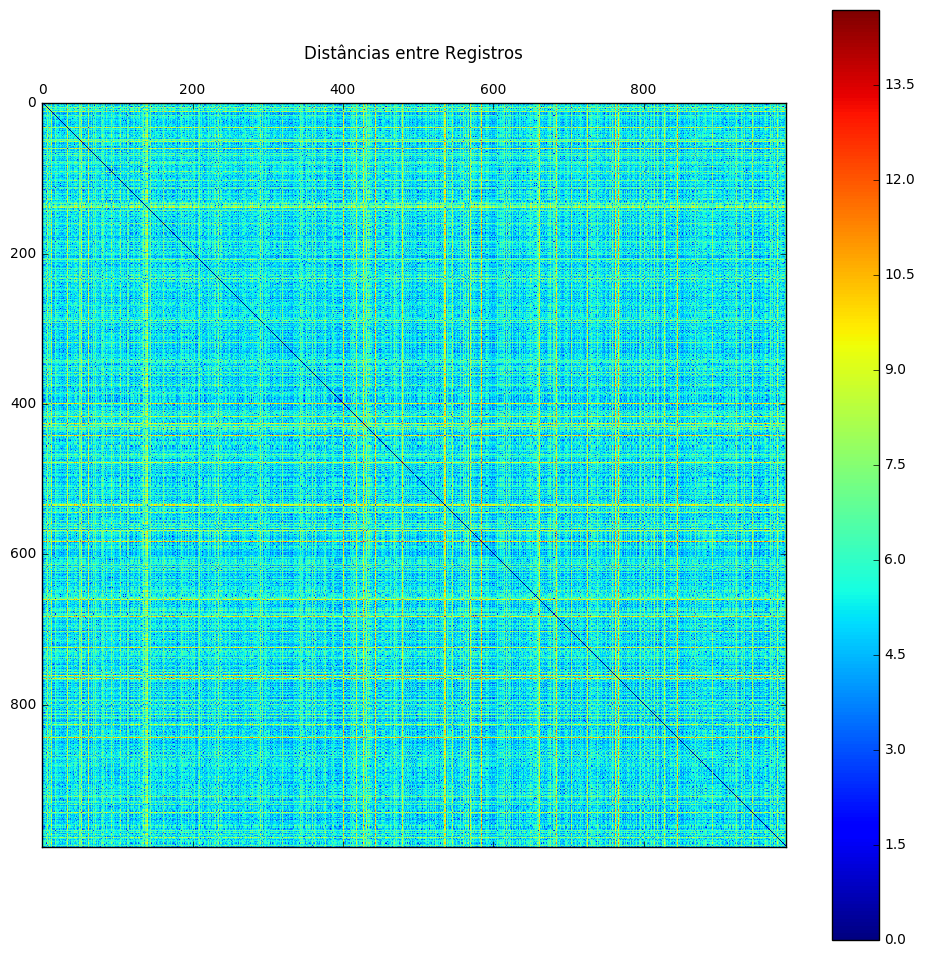

In [18]:
distances = pdist(train_minmax.values, metric='euclidean')
DistMatrix = squareform(distances)

mat = matshow(DistMatrix, cmap='jet')
title("Distâncias entre Registros")
colorbar(mat);

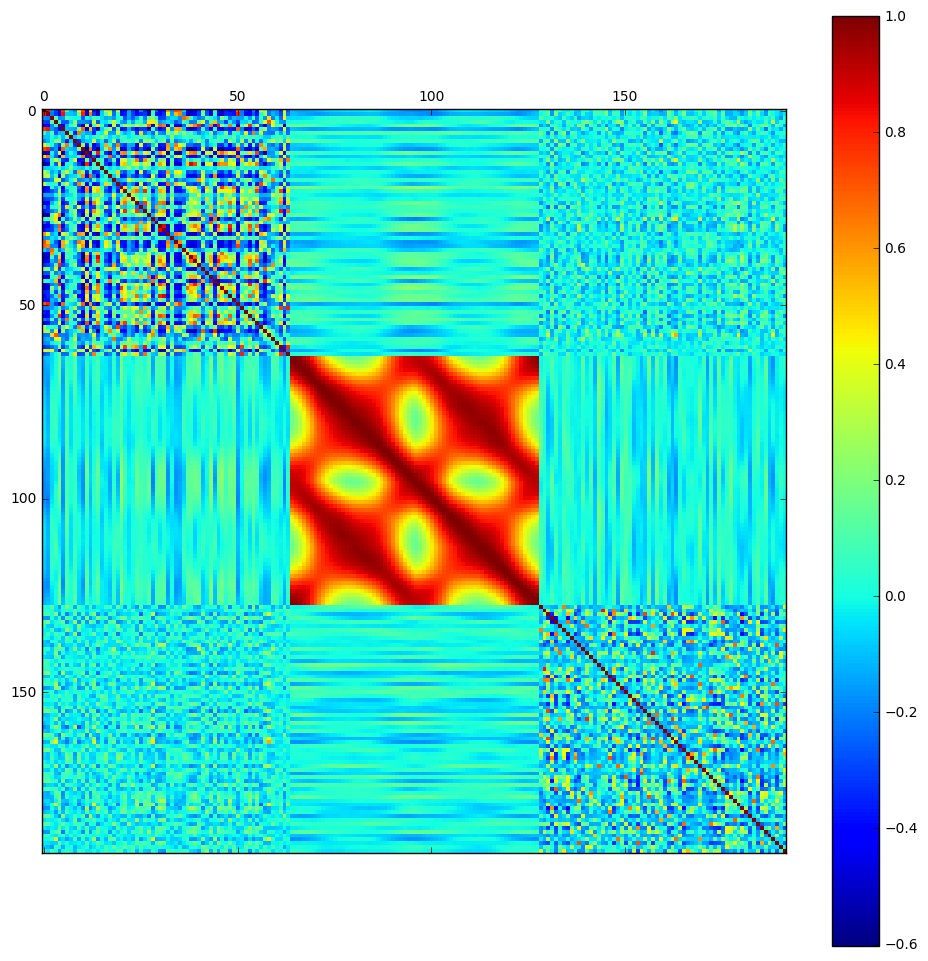

In [19]:
figure(figsize=(12,6))
mat = matshow(train_minmax.corr(), cmap='jet')
colorbar(mat);

#### Observações:

Como foi dito anteriormente a influência da diferença de escalas entre os atributos poderia causar interferência na análise das matrizes. Após a padronização, podemos perceber que, de fato, alguns atributos do vetor *shape* tem distância praticamente nula entre si. Porém há alguns outros bem comportados.

### Detecção de outliers:

Tendo padronizado as variáveis, calculamos a média de distâncias para cada registro e plotamos um gráfico:

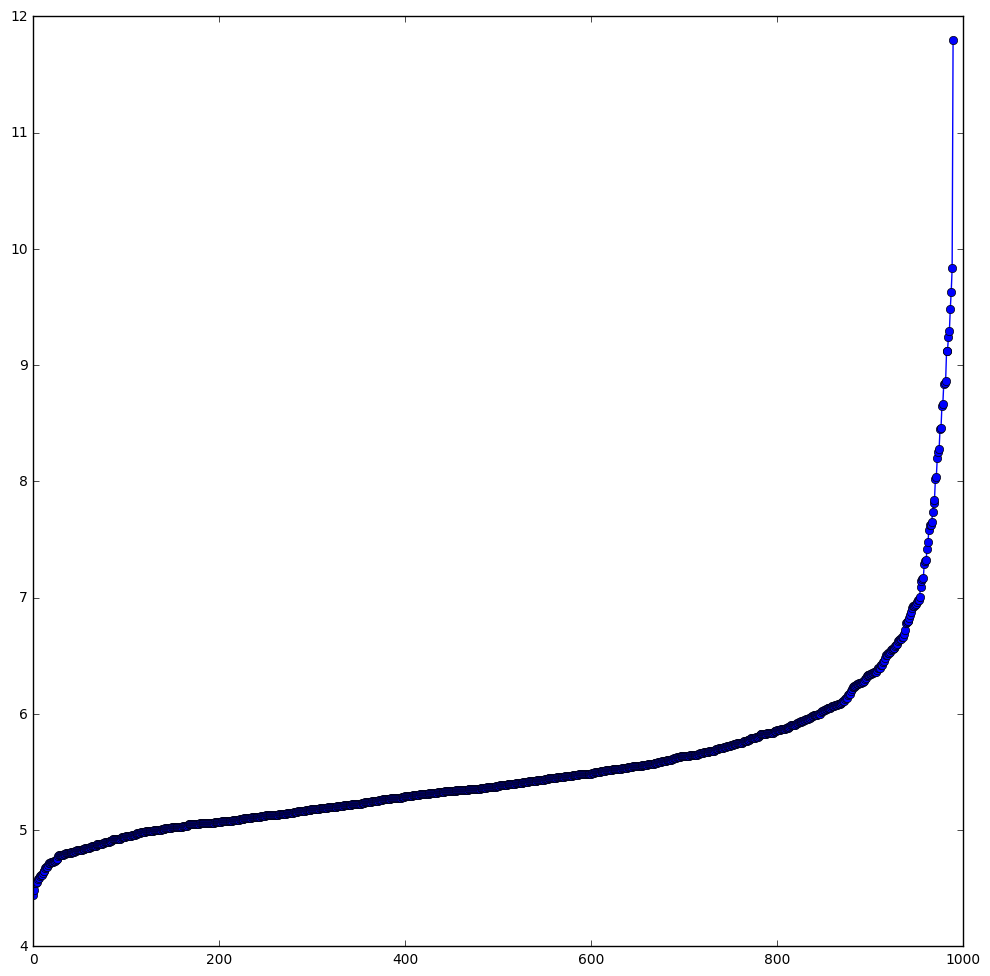

In [20]:
meanDistances = []

for i in range(DistMatrix.shape[0]):
    meanDistances.append(
        sum(DistMatrix[i])/(DistMatrix[i].shape[0])
    )
    
meanDistances = asarray(meanDistances)
    
plot(arange(meanDistances.shape[0]), 
     sort(meanDistances), marker="o")

#### Observações:

Através do plot acima pode ser escolhido um intervalo de registros a serem removidos, considerando-os *outliers*.

### Tentativa de alcançar a distribuição normal:

Os testes a seguir são as nossas tentativas de padronizar as variáveis para uma distribuição normal, realizando a operação de log nos valores e posteriormente realizando o cálculo de *z-score*.

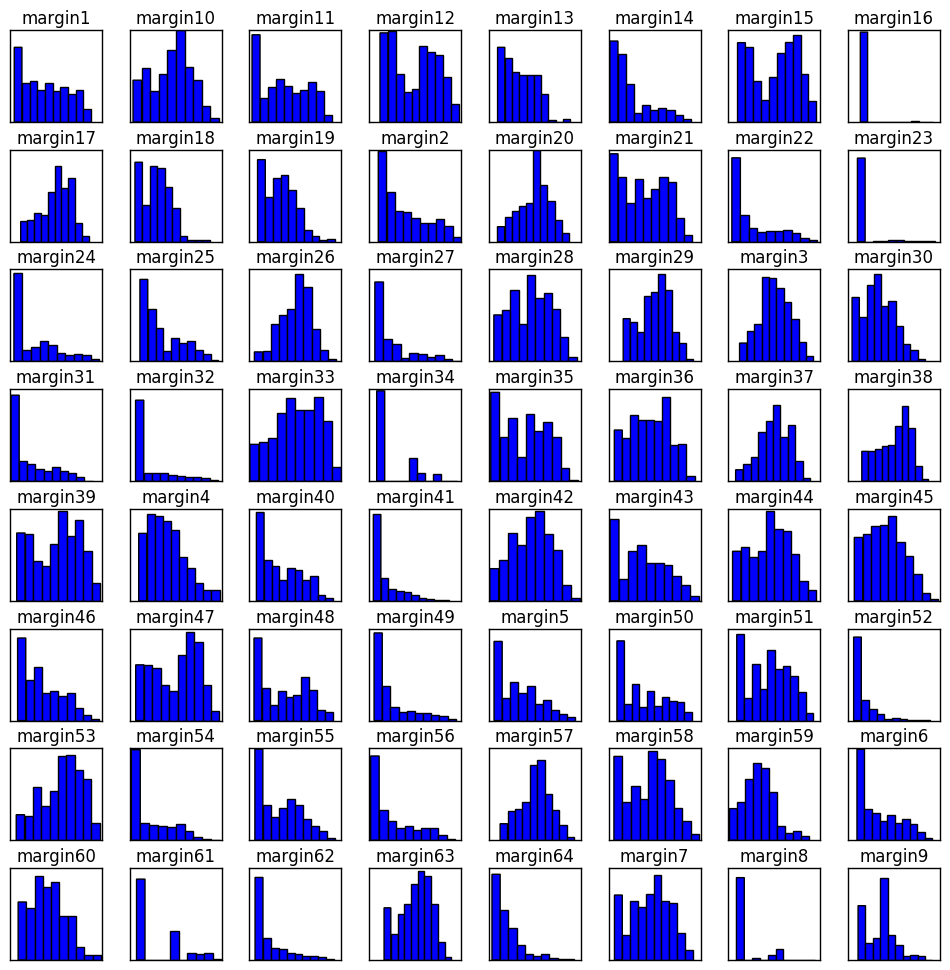

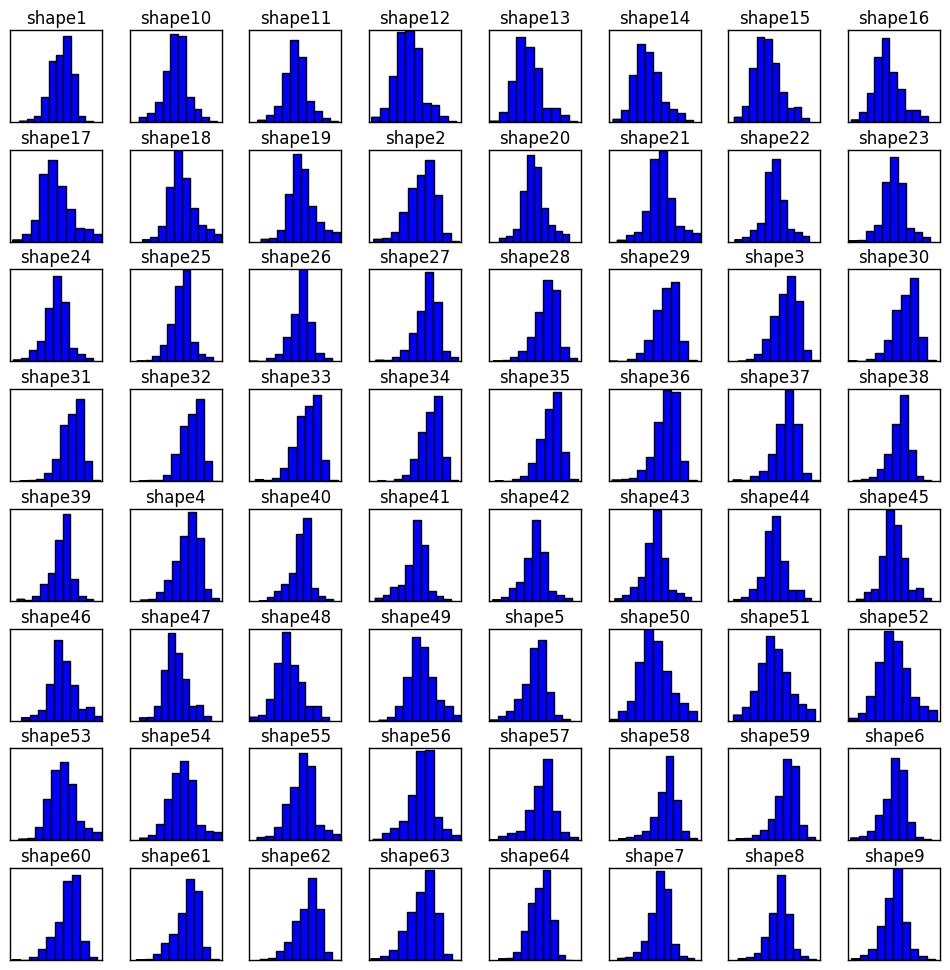

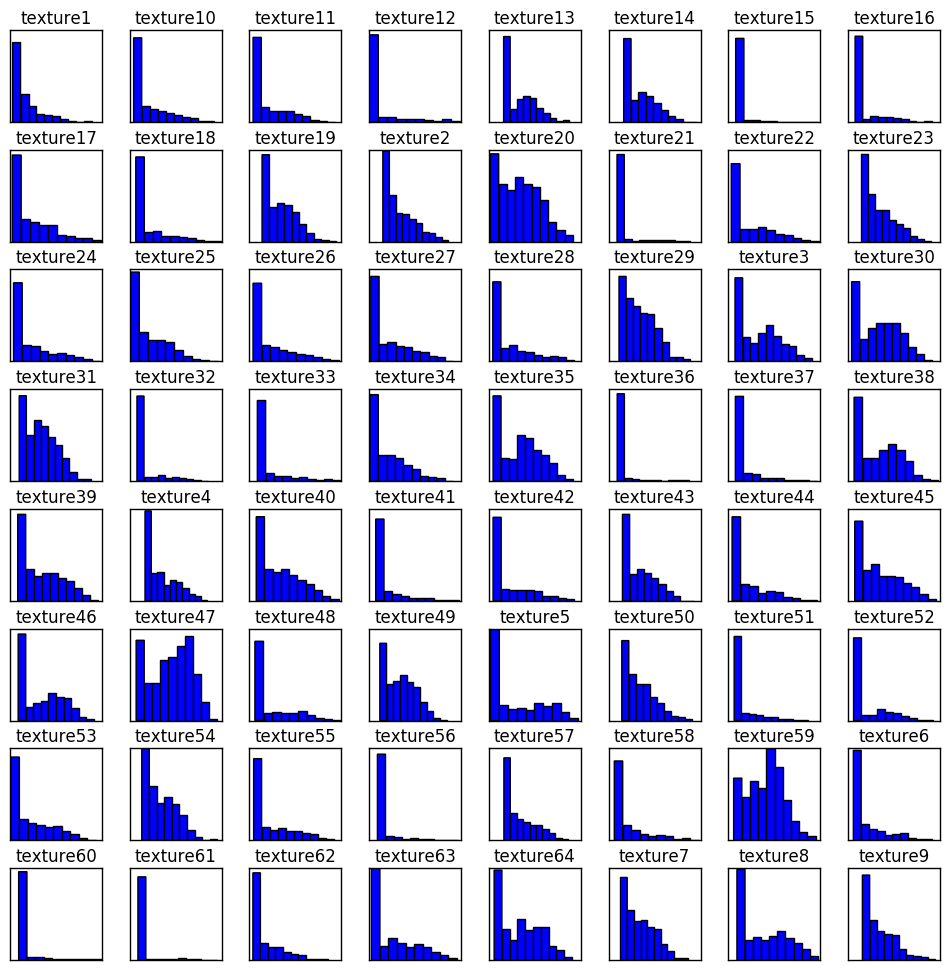

In [21]:
""""""
# Padronização por zscore do log
train_zscore = train

for c in train_zscore.columns.values:
    #print(c)
    minimum = min(train_zscore[c].values)
    minimum = abs(minimum)+0.1 if (minimum < 0) else 0.1
    #print(len(stats.boxcox(train_zscore[c].values+minimum)))
    train_zscore[c] = stats.zscore(
        log(train_zscore[c].values+minimum)
    )
    
#train = train_zscore
""""""

figure(figsize(12,12))
mat = train_zscore.ix[:,'margin1':'margin64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)

figure(figsize(12,12))
mat = train_zscore.ix[:,'shape1':'shape64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        
figure(figsize(12,12))
mat = train_zscore.ix[:,'texture1':'texture64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        

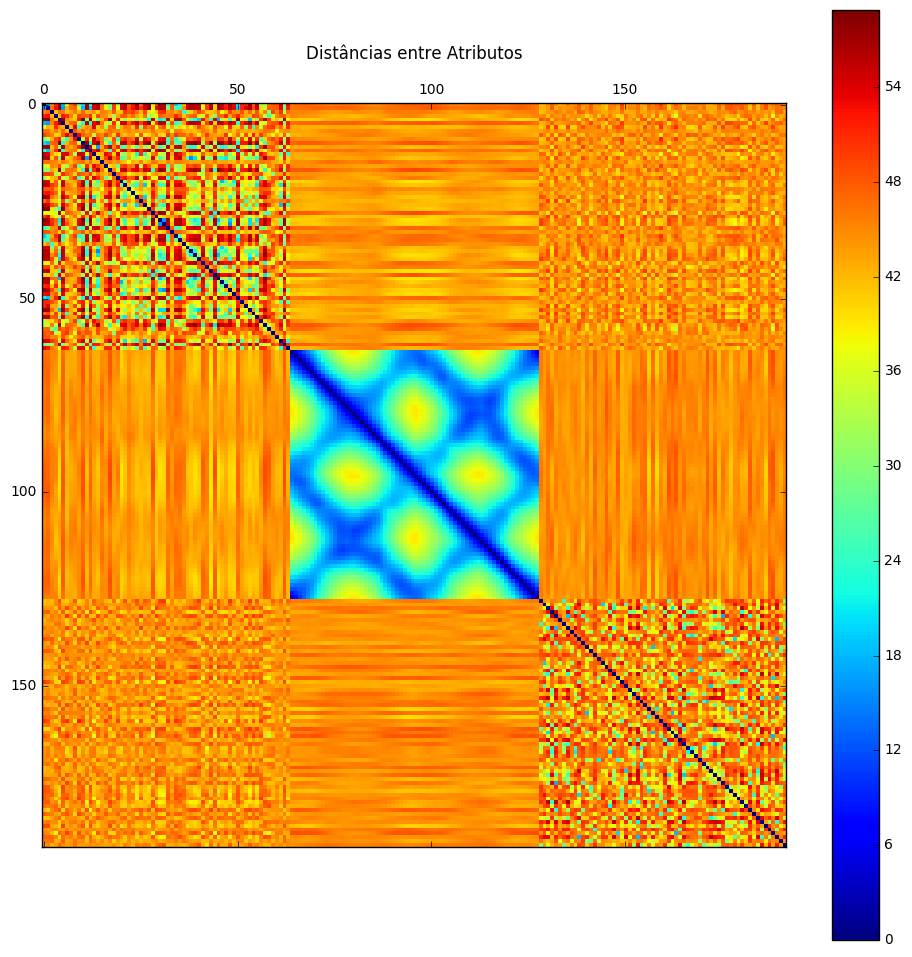

In [22]:
figure(figsize=(12,6))

distance = lambda column1, column2: pd.np.linalg.norm(column1 - column2)
distMat = train_zscore.apply(
    lambda col1: train_zscore.apply(
        lambda col2: distance(col1, col2)))
mat = matshow(distMat, cmap='jet')
title("Distâncias entre Atributos")
colorbar(mat);

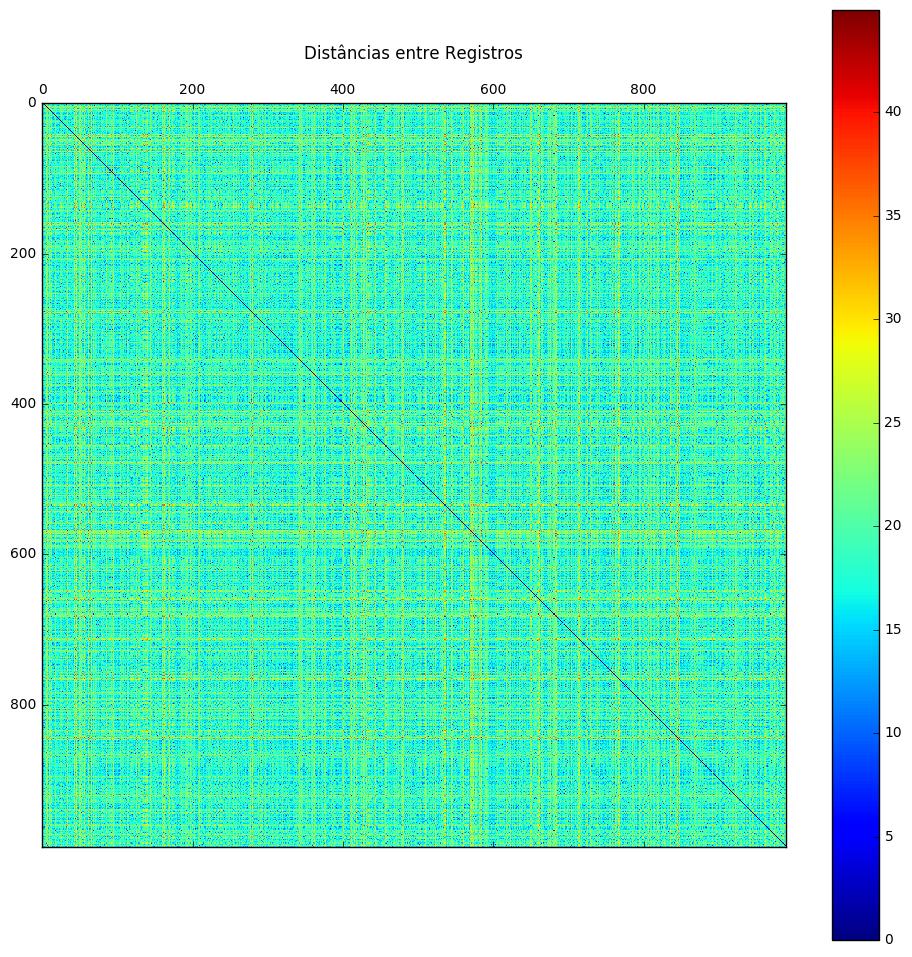

In [23]:
distances = pdist(train_zscore.values, metric='euclidean')
DistMatrix = squareform(distances)

mat = matshow(DistMatrix, cmap='jet')
title("Distâncias entre Registros")
colorbar(mat);

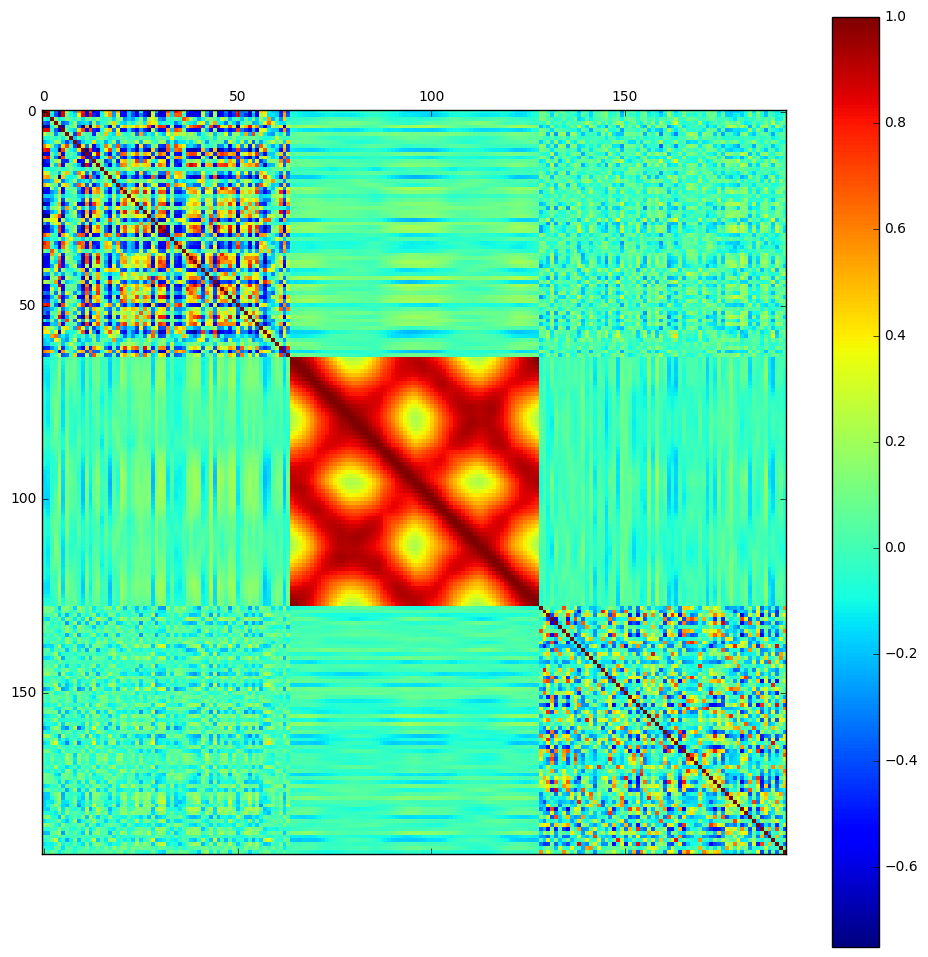

In [24]:
figure(figsize=(12,6))
mat = matshow(train_zscore.corr(), cmap='jet')
colorbar(mat);

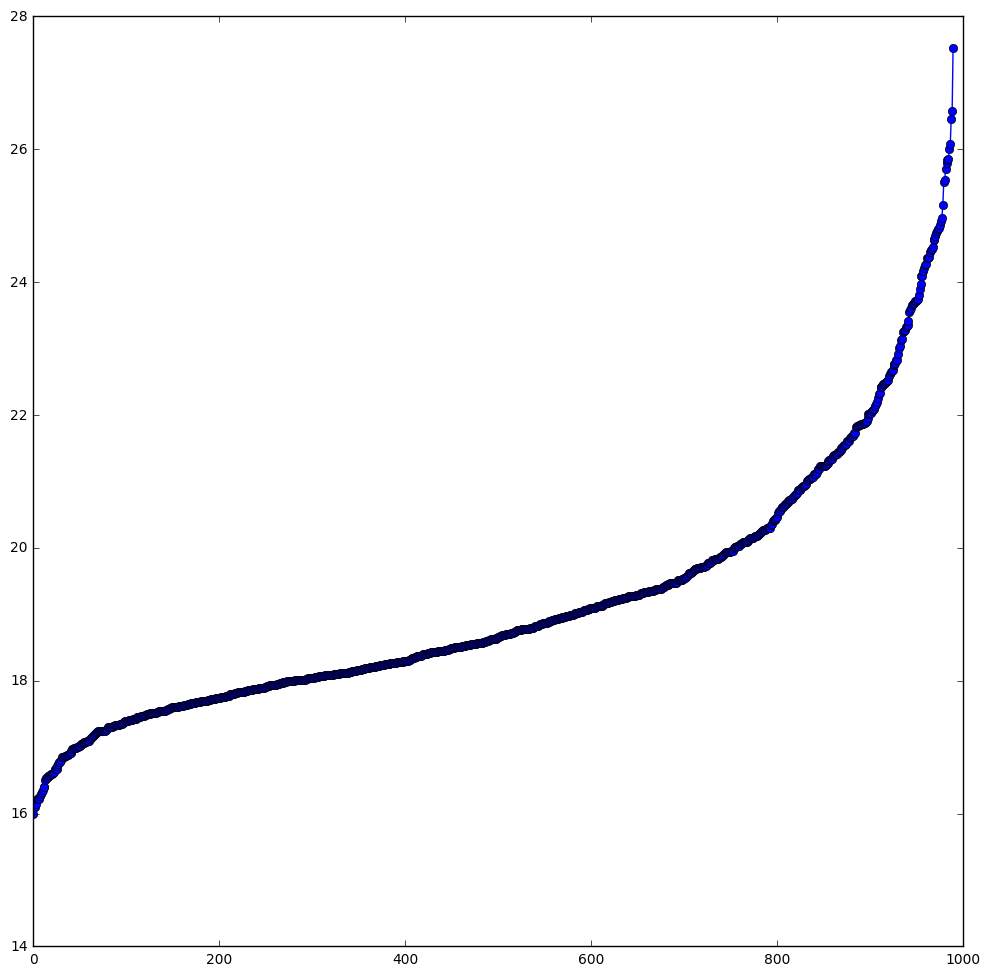

In [25]:
meanDistances = []

for i in range(DistMatrix.shape[0]):
    meanDistances.append(sum(DistMatrix[i])/(DistMatrix[i].shape[0]))
    
meanDistances = asarray(meanDistances)
    
plot(arange(meanDistances.shape[0]), sort(meanDistances), marker="o")

## Conclusoẽs gerais das análises preliminares:

O conjunto de dados de treinamento não apresenta facilidade em ser separado de forma linear sem que seja adequadamente tratado. Percebemos por meio das análises anteriores, características que podem vir a afetar o bom desempenho de algumas técnicas, como a assimetria das distribuições de valores das variáveis e apresença de *outliers*. 

Porém, é possível realizar a diminuição de dimensionalidade do problema e alguns atributos mostraram-se promissores, principalmente um subconjunto dos atributos do vetor *shape*, por apresentarem baixa correlação entre si e distribuição próxima da normal.

# Apresentação da tecnologia:

Optamos por utilizar a linguagem de programação **Python** em conjunto com um grande conjunto de bibliotecas que permitem, entre outras funções, a análise de dados (*pandas*), operações estatísticas (*scipy.stats*), aprendizado de máquina (*scikit-learn*), operações numéricas com *arrays* (*numpy*) e a criação de gráficos (*matplotlib*). 

Todo esse ferramental está apoiado no *framework* **Jupyter** que permite a criação de um caderno virtual e interativo no qual pode-se misturar, código, anotações em linguagem de marcação (**Markdown**) e visualização de gráficos.

Além disso, os *notebooks* Jupyter podem ser exportados em formato de documento *pdf*, por exemplo. O presente relatório é produto da utilização dessas ferramentas.

Pretendemos continuar com as mesmas ferramentas na segunda etapa do projeto.
